# IRIS FLOWER CLASSIFIER

~ By Ayanna Malik


### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.drop("Id", axis=1, inplace=True)

In [ ]:
df.shape

(150, 5)

In [ ]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


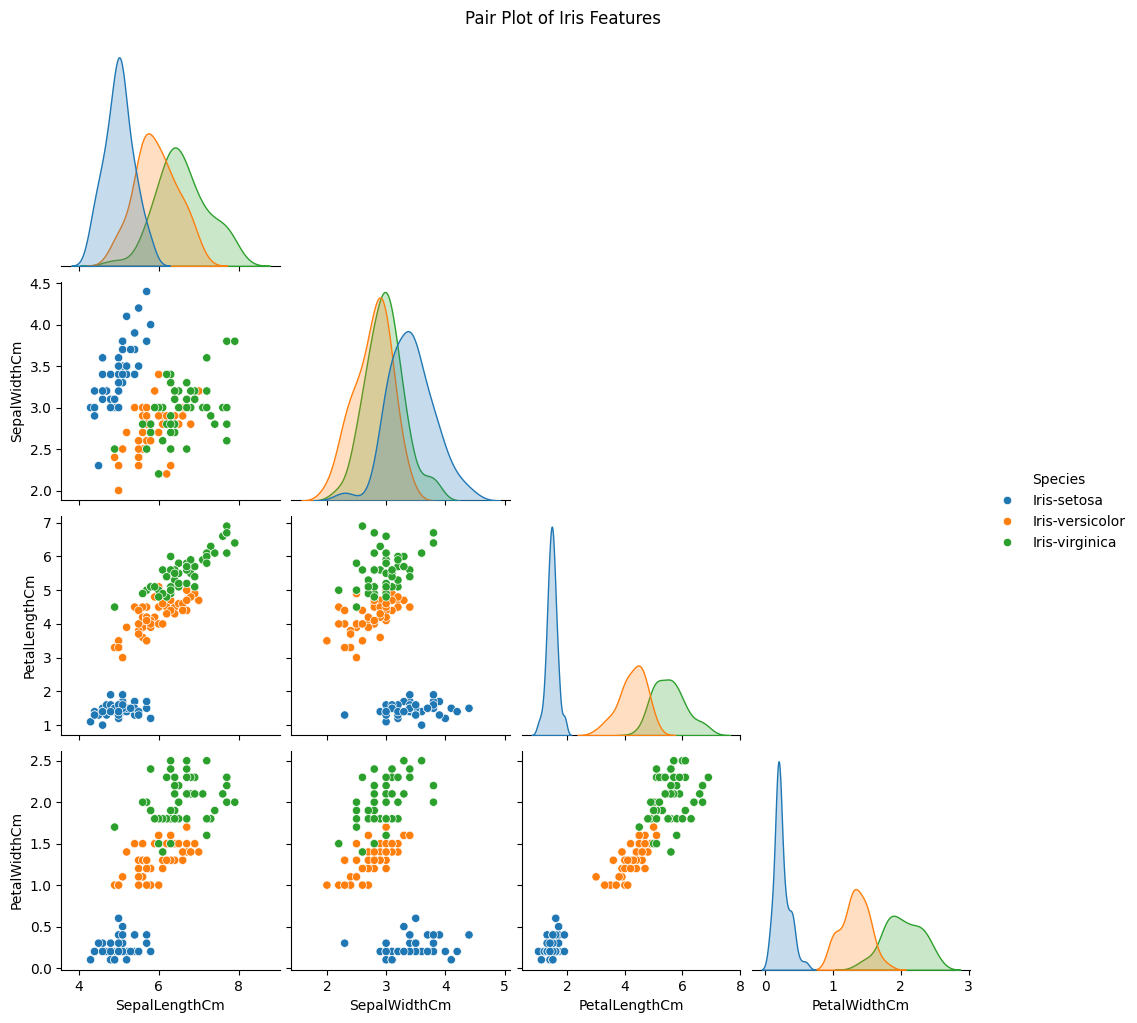

In [ ]:
sns.pairplot(df, hue='Species', diag_kind='kde', corner=True)
plt.suptitle("Pair Plot of Iris Features", y=1.02)
plt.show()

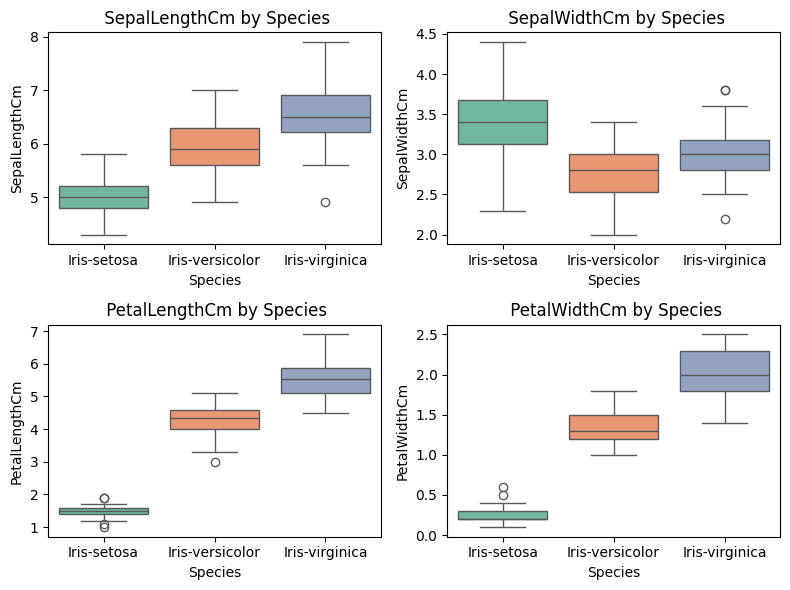

In [ ]:
#One boxplot per feature
features = df.columns[:-1]

plt.figure(figsize=(8,6))
for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x="Species", y=col, hue="Species", palette="Set2", legend=False)
    plt.title(f" {col} by Species")
plt.tight_layout()
plt.show()

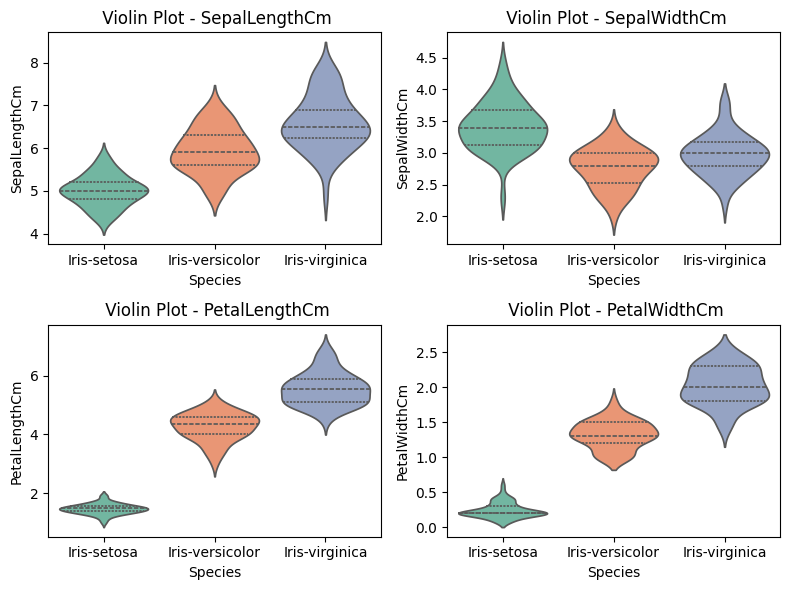

In [ ]:
plt.figure(figsize=(8, 6))
for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(data=df, x="Species", y=col, inner="quartile", hue="Species", palette="Set2" )
    plt.title(f" Violin Plot - {col}")
plt.tight_layout()
plt.show()

In [ ]:
df.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

X=df.drop('Species',axis=1)
y=df['Species']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
ml_models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

ml_predictions = {}
accuracies = {}
print("ML Models:")

ML Models:


Random Forest: Accuracy = 1.0000


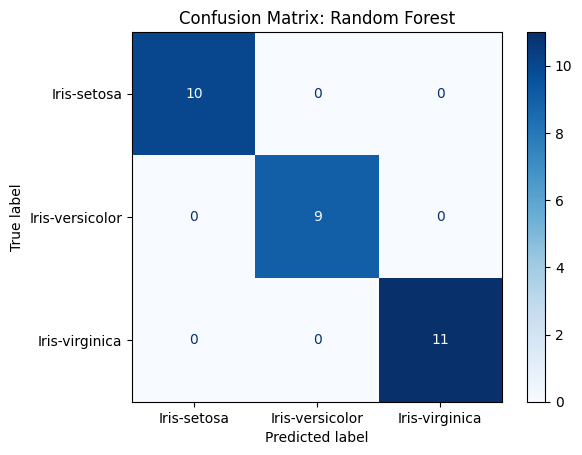

SVM: Accuracy = 1.0000


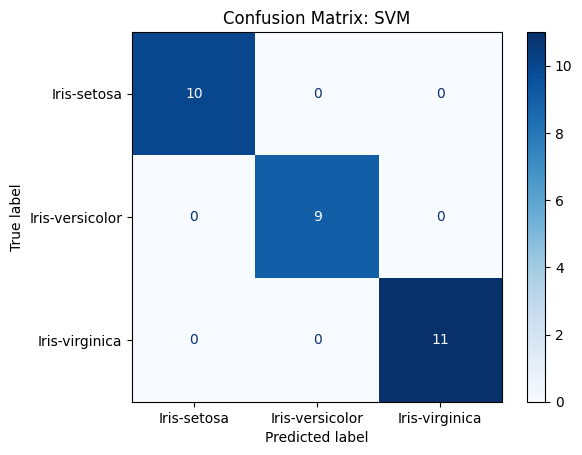

KNN: Accuracy = 1.0000


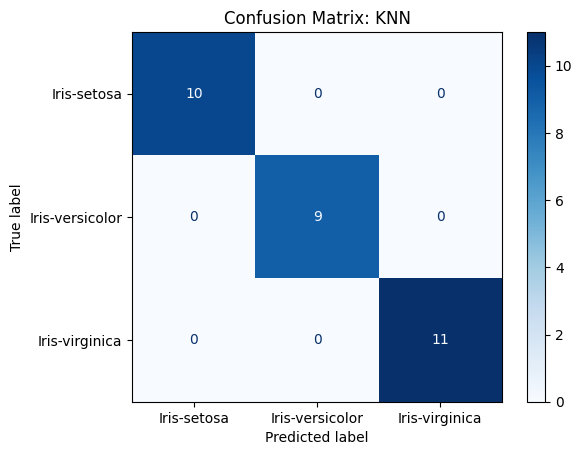

Logistic Regression: Accuracy = 1.0000


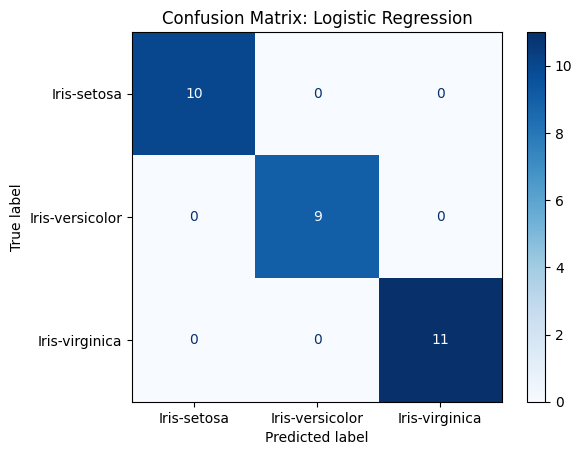

Decision Tree: Accuracy = 1.0000


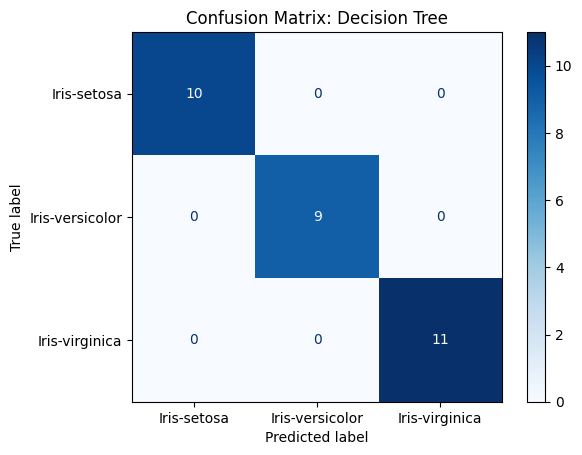

In [ ]:
for name, model in ml_models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    ml_predictions[name] = preds
    acc = accuracy_score(y_test, preds)
    accuracies[name] = acc
    print(f"{name}: Accuracy = {acc:.4f}")

    # Show confusion matrix
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.show()


In [ ]:
true_labels = encoder.inverse_transform(y_test.to_numpy())

data = pd.DataFrame({"True Label": true_labels})
for name, preds in ml_predictions.items():
    data[name + " Prediction"] = encoder.inverse_transform(np.array(preds))
data.to_csv("iris_predictions.csv", index=False)

print("\nSaved: iris_predictions.csv")


Saved: iris_predictions.csv


In [ ]:
df1 = pd.read_csv("iris_predictions.csv")
df1.head()

,True Label,Random Forest Prediction,SVM Prediction,KNN Prediction,Logistic Regression Prediction,Decision Tree Prediction
0,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor
1,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
2,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica
3,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor
4,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-versicolor


In [ ]:
print("\nModel Accuracy Summary:")
for name, acc in accuracies.items():
    print(f"{name}: {acc:.4f}")


Model Accuracy Summary:
Random Forest: 1.0000
SVM: 1.0000
KNN: 1.0000
Logistic Regression: 1.0000
Decision Tree: 1.0000


In [ ]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
